### I. Introduction

Data information
- info
- Customers: Ages, Gender, Country, State
- Products: Categories and Subcategories

Data Wrangling
- Clean up missing, NaN, duplicates
- Adjust dtype

EDA
- Define goal
- Summay statistics
- Visualize data with plots and tables
- Identify noticeable patterns and relationships that align with the goal (compare subsets, test hypothesese, identify correlations)
- Draw conclusions an dmake recommendations


### II. Import Libraries

In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [48]:
# import SalesForCourse_quizz_table.csv
sales_df = pd.read_csv('../Raw_Data/SalesForCourse_quizz_table.csv')

### III. Data Information


In [49]:
# call the info() method to see the data types of the columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [50]:
# call the head() method to see the first 5 rows of the data
sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


#### A. Customer Ages

In [51]:
# sort age column in ascending order
sales_df.sort_values(by='Customer Age', ascending=True)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
19406,19406,09/22/15,2015.0,September,17.0,F,France,Loiret,Accessories,Tires and Tubes,3.0,14.67,14.333333,44.0,43.000000,NaN
21065,21065,11/26/15,2015.0,November,17.0,M,United Kingdom,England,Accessories,Tires and Tubes,1.0,30.00,32.000000,30.0,32.000000,NaN
21149,21149,02/13/16,2016.0,February,17.0,M,United States,California,Clothing,Shorts,1.0,70.00,92.000000,70.0,92.000000,NaN
11840,11840,12/18/15,2015.0,December,17.0,M,United States,California,Bikes,Road Bikes,2.0,270.00,231.000000,540.0,462.000000,NaN
11839,11839,10/23/15,2015.0,October,17.0,M,United States,California,Bikes,Road Bikes,2.0,560.00,515.000000,1120.0,1030.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,12125,09/28/15,2015.0,September,86.0,F,France,Yveline,Accessories,Tires and Tubes,3.0,75.00,81.333333,225.0,244.000000,NaN
4261,4261,02/19/16,2016.0,February,87.0,F,Germany,Saarland,Accessories,Tires and Tubes,2.0,7.00,11.000000,14.0,22.000000,NaN
4262,4262,02/19/16,2016.0,February,87.0,F,Germany,Saarland,Accessories,Bike Racks,3.0,80.00,127.666667,240.0,383.000000,NaN
4260,4260,02/19/16,2016.0,February,87.0,F,Germany,Saarland,Accessories,Tires and Tubes,3.0,25.00,33.666667,75.0,101.000000,NaN


<AxesSubplot: >

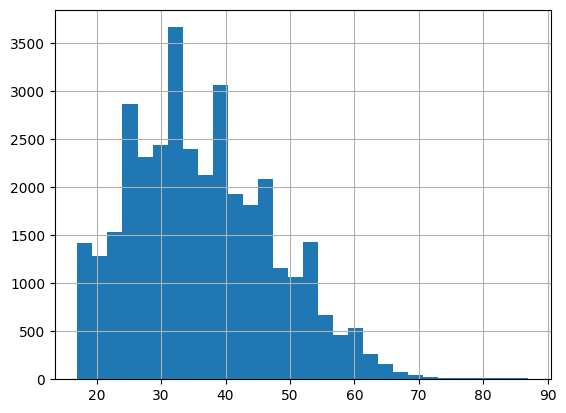

In [52]:
# plot the histogram of the Customer Age column
sales_df['Customer Age'].hist(bins=30)

Text(0.5, 1.0, 'Number of Customers by Age Group')

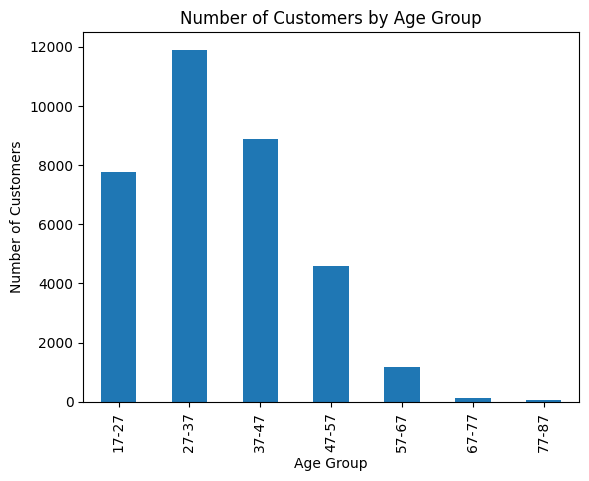

In [53]:
# group Customer Age column from 17 to 99 in 10 year intervals
sales_df['Customer Age Group'] = pd.cut(sales_df['Customer Age'], bins=[17, 27, 37, 47, 57, 67, 77, 87], labels=['17-27', '27-37', '37-47', '47-57', '57-67', '67-77', '77-87'])

# plot the histogram of the Customer Age Group column and sort the values in ascending order, save to variable
sales_age_group = sales_df['Customer Age Group'].value_counts().sort_index().plot(kind='bar')
sales_age_group.set_xlabel('Age Group')
sales_age_group.set_ylabel('Number of Customers')
sales_age_group.set_title('Number of Customers by Age Group')

In [45]:
# summarize the Customer Age Group column
sales_df['Customer Age Group'].value_counts()


27-37    11900
37-47     8896
17-27     7769
47-57     4590
57-67     1181
67-77      122
77-87       51
Name: Customer Age Group, dtype: int64

In [46]:
# summary statistics of the Customer Age column
sales_df['Customer Age'].describe()

count    34866.000000
mean        36.382895
std         11.112902
min         17.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         87.000000
Name: Customer Age, dtype: float64

#### B. Customer Gender

In [8]:
# percentage of customers who are female
sales_df['Customer Gender'].value_counts(normalize=True)

M    0.510669
F    0.489331
Name: Customer Gender, dtype: float64

Text(0.5, 1.0, 'Percentage of Customers by Gender')

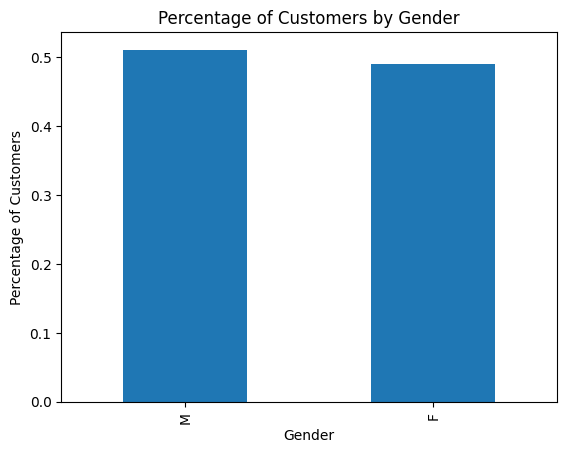

In [9]:
# plot the percentage of customers who are female, save to variable
sales_gender = sales_df['Customer Gender'].value_counts(normalize=True).plot(kind='bar')
sales_gender.set_xlabel('Gender')
sales_gender.set_ylabel('Percentage of Customers')
sales_gender.set_title('Percentage of Customers by Gender')

Text(0.5, 1.0, 'Number of Customers by Age and Gender')

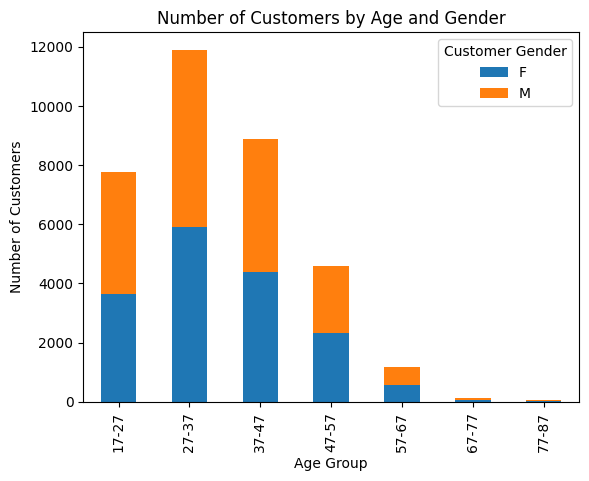

In [40]:
# show breakdown of sales_age_group and sales_gender in a stacked bar chart

sales_gender_age = pd.crosstab(sales_df['Customer Age Group'], sales_df ['Customer Gender'])
sales_gender_age.plot(kind='bar', stacked=True)

# set x and y axis labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age and Gender')


#### C. Customers by Location

Text(0.5, 1.0, 'Number of Customers by Country')

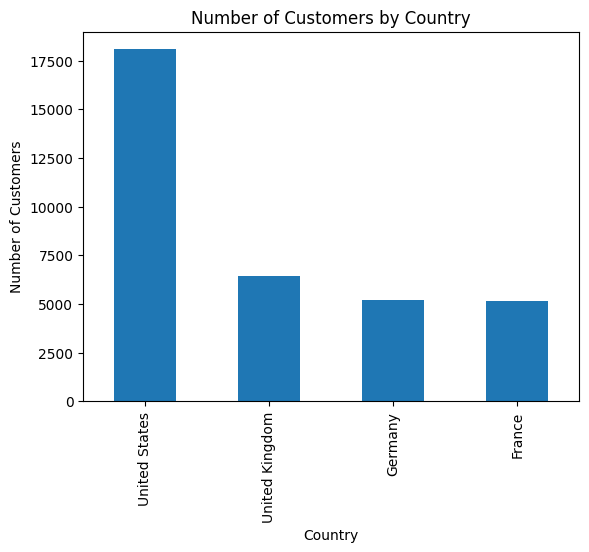

In [42]:
# show the number of customers by country
sales_country = sales_df['Country'].value_counts().plot(kind='bar')
sales_country.set_xlabel('Country')
sales_country.set_ylabel('Number of Customers')
sales_country.set_title('Number of Customers by Country')

Text(0.5, 1.0, 'Number of Customers by State')

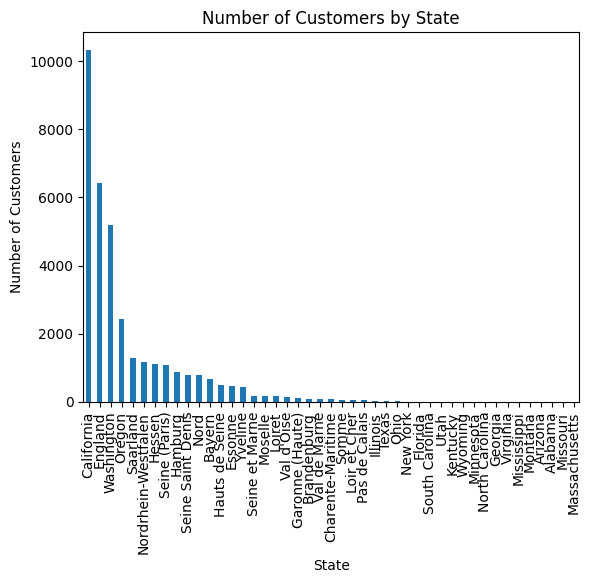

In [43]:
# show the number of customers by state
sales_state = sales_df['State'].value_counts().plot(kind='bar')
sales_state.set_xlabel('State')
sales_state.set_ylabel('Number of Customers')
sales_state.set_title('Number of Customers by State')

In [ ]:
# show pro

### Data Wrangling

In [11]:
# remove column 'Column1' from the dataframe
sales_df.drop('Column1', axis=1, inplace=True)

In [12]:
# call the head() method to see the first 5 rows of the data
sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Age Group
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,27-37
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,27-37
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,27-37
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,27-37
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,27-37


In [13]:
# check for missing values
sales_df.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Customer Age Group    358
dtype: int64

In [14]:
# create a new dataframe with the rows that have missing values in the all columns except 'index' and 'Revenue'
sales_df[sales_df.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Age Group
1006,1006,12/04/15,2015.0,December,17.0,F,France,Seine Saint Denis,Clothing,Caps,3.0,48.00,70.000000,144.0,210.000000,NaN
1007,1007,12/04/15,2015.0,December,17.0,F,France,Seine Saint Denis,Clothing,Jerseys,1.0,54.00,50.000000,54.0,50.000000,NaN
1008,1008,12/31/15,2015.0,December,17.0,F,France,Seine Saint Denis,Clothing,Jerseys,2.0,100.00,127.500000,200.0,255.000000,NaN
1009,1009,03/29/16,2016.0,March,17.0,M,United Kingdom,England,Clothing,Gloves,3.0,24.33,29.000000,73.0,87.000000,NaN
2142,2142,03/05/16,2016.0,March,17.0,M,United States,Oregon,Clothing,Jerseys,3.0,16.67,20.666667,50.0,62.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34621,34621,07/24/15,2015.0,July,17.0,F,United States,California,Bikes,Road Bikes,1.0,540.00,550.000000,540.0,550.000000,NaN
34622,34622,08/22/15,2015.0,August,17.0,F,United States,California,Bikes,Road Bikes,3.0,814.33,676.000000,2443.0,2028.000000,NaN
34623,34623,11/20/15,2015.0,November,17.0,F,United States,California,Bikes,Road Bikes,2.0,1221.50,1024.000000,2443.0,2048.000000,NaN
34624,34624,12/03/15,2015.0,December,17.0,F,United States,California,Bikes,Road Bikes,3.0,180.00,174.333333,540.0,523.000000,NaN


In [15]:
# drop the rows that have missing values in the all columns except 'index' and 'Revenue'
sales_df.dropna(axis=0, how='all', subset=['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost'], inplace=True)

In [16]:
# check that the missing values have been removed
sales_df.isnull().sum()

index                   0
Date                    0
Year                    0
Month                   0
Customer Age            0
Customer Gender         0
Country                 0
State                   0
Product Category        0
Sub Category            0
Quantity                0
Unit Cost               0
Unit Price              0
Cost                    0
Revenue                 0
Customer Age Group    357
dtype: int64

In [17]:
# Look for duplicate rows
duplicates = sales_df.duplicated(keep=False)
sales_df[duplicates]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Age Group


In [18]:
# Use the info method to see the data types of the columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               34866 non-null  int64   
 1   Date                34866 non-null  object  
 2   Year                34866 non-null  float64 
 3   Month               34866 non-null  object  
 4   Customer Age        34866 non-null  float64 
 5   Customer Gender     34866 non-null  object  
 6   Country             34866 non-null  object  
 7   State               34866 non-null  object  
 8   Product Category    34866 non-null  object  
 9   Sub Category        34866 non-null  object  
 10  Quantity            34866 non-null  float64 
 11  Unit Cost           34866 non-null  float64 
 12  Unit Price          34866 non-null  float64 
 13  Cost                34866 non-null  float64 
 14  Revenue             34866 non-null  float64 
 15  Customer Age Group  34509 non-null  

In [19]:
# convert the 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [20]:
# convert the 'Year' column to int
sales_df['Year'] = sales_df['Year'].astype(int)

In [21]:
# verify that the data types have been changed
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               34866 non-null  int64         
 1   Date                34866 non-null  datetime64[ns]
 2   Year                34866 non-null  int32         
 3   Month               34866 non-null  object        
 4   Customer Age        34866 non-null  float64       
 5   Customer Gender     34866 non-null  object        
 6   Country             34866 non-null  object        
 7   State               34866 non-null  object        
 8   Product Category    34866 non-null  object        
 9   Sub Category        34866 non-null  object        
 10  Quantity            34866 non-null  float64       
 11  Unit Cost           34866 non-null  float64       
 12  Unit Price          34866 non-null  float64       
 13  Cost                34866 non-null  float64   

### Analysis

#### I. Pricing by product and customer characteristics:

In [22]:
# How does pricing vary by product category or subcategory?
# create a new dataframe with the mean of the 'Unit Price' and 'Unit Cost' columns grouped by 'Product Category' and 'Sub Category'
price_df = sales_df.groupby(['Product Category', 'Sub Category'])['Unit Price', 'Unit Cost'].mean()
price_df

C:\Users\annco\AppData\Local\Temp\ipykernel_17348\2430815824.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_df = sales_df.groupby(['Product Category', 'Sub Category'])['Unit Price', 'Unit Cost'].mean()


Unit Price    Unit Cost
Product Category Sub Category                               
Accessories      Bike Racks          885.839806   666.796117
                 Bike Stands         612.243678   511.358621
                 Bottles and Cages    81.944319    67.016591
                 Cleaners             92.452294    76.189046
                 Fenders             276.916885   216.060079
                 Helmets             395.600655   320.998211
                 Hydration Packs     630.190236   513.402828
                 Tires and Tubes     156.606686   128.698957
Bikes            Mountain Bikes     1149.457070  1116.133062
                 Road Bikes          781.171575   762.726820
                 Touring Bikes      1090.759620  1049.057496
Clothing         Caps                104.151395    86.656889
                 Gloves              299.732986   239.738917
                 Jerseys             553.080333   462.689645
                 Shorts              753.058598   658.486449
                 Socks                97.614927    82.454670
                 Vests               712.315705   600.345128

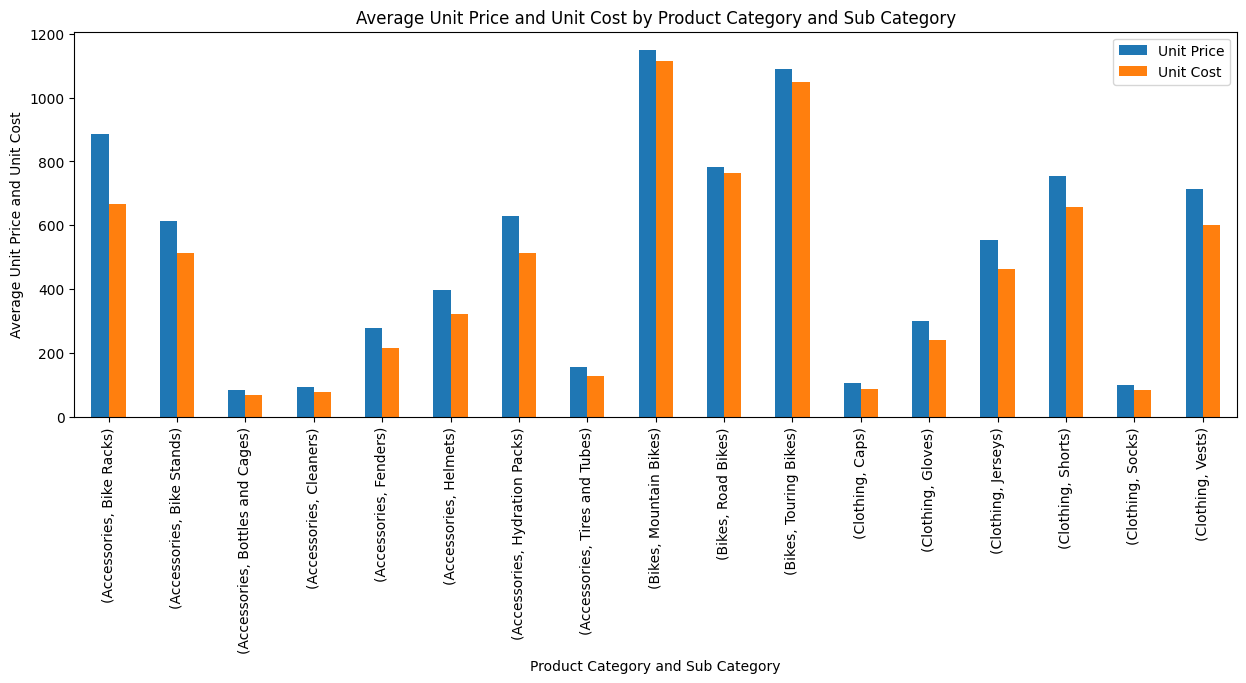

In [23]:
# visualize the data
price_df.plot(kind='bar', figsize=(15, 5))
plt.title('Average Unit Price and Unit Cost by Product Category and Sub Category')
plt.xlabel('Product Category and Sub Category')
plt.ylabel('Average Unit Price and Unit Cost')
plt.show()

In [24]:
# What is the relationship between pricing and customer demographics (e.g. age, gender)?
# create a new dataframe with the mean of the 'Unit Price' and 'Unit Cost' columns grouped by 'Customer Age' and 'Customer Gender'
price_df = sales_df.groupby(['Customer Age', 'Customer Gender'])['Unit Price', 'Unit Cost'].mean()
price_df

C:\Users\annco\AppData\Local\Temp\ipykernel_17348\4228882857.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_df = sales_df.groupby(['Customer Age', 'Customer Gender'])['Unit Price', 'Unit Cost'].mean()


Unit Price    Unit Cost
Customer Age Customer Gender                          
17.0         F                 216.136029   194.734118
             M                 246.409502   214.771629
18.0         F                 302.567376   262.195021
             M                 303.095679   265.088657
19.0         F                 307.895604   275.531722
...                                   ...          ...
84.0         M                  62.000000    50.335000
85.0         M                 170.312500   140.187500
86.0         F                  84.166666    91.500000
             M                1709.666667  1027.165000
87.0         F                  57.444445    37.333333

[132 rows x 2 columns]

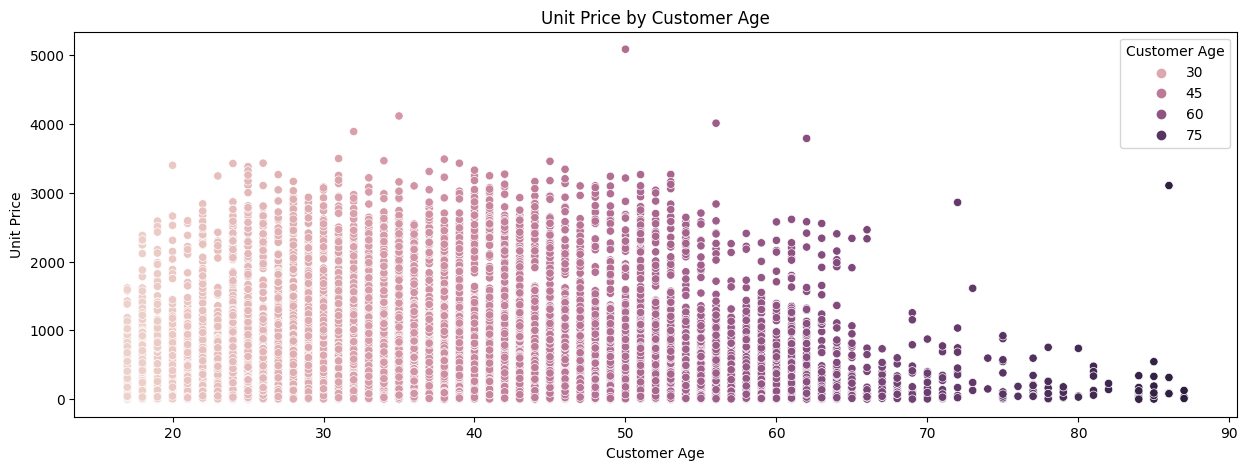

In [25]:
# visualize the relationship between pricing and customer age as a scatter plot
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Customer Age', y='Unit Price', hue='Customer Age', data=sales_df)
plt.title('Unit Price by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Unit Price')
plt.show()

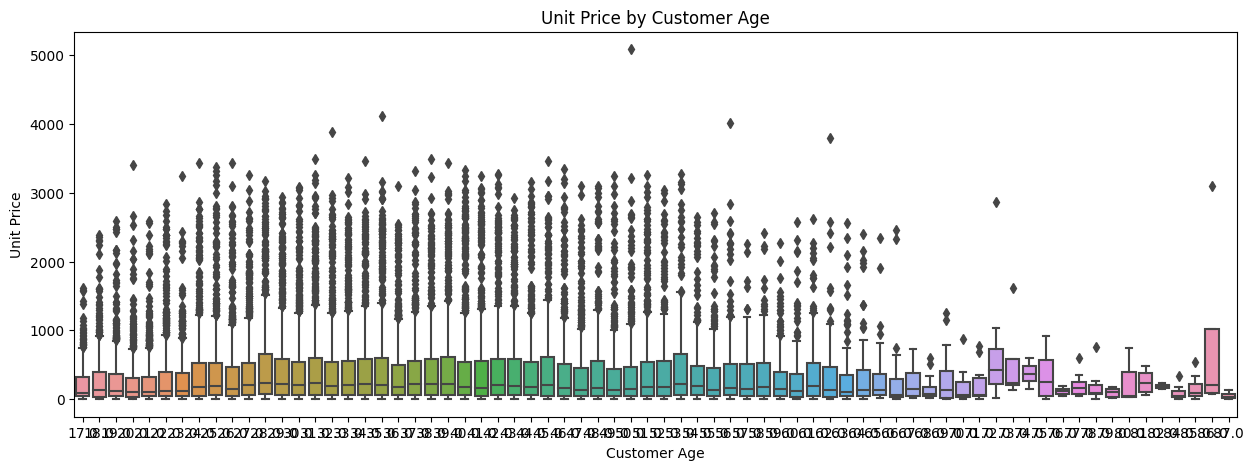

In [26]:
# visualize the relationship between pricing and customer age as a box plot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Customer Age', y='Unit Price', data=sales_df)
plt.title('Unit Price by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Unit Price')
plt.show()

In [27]:
# group 'Customer Age' into 6 age groups form 1


In [28]:
# What is the average price of products in each product category or subcategory?
# create a new dataframe with the mean of the 'Unit Price' and 'Unit Cost' columns grouped by 'Product Category' and 'Sub Category'
price_df = sales_df.groupby(['Product Category', 'Sub Category'])['Unit Price', 'Unit Cost'].mean()
price_df

C:\Users\annco\AppData\Local\Temp\ipykernel_17348\3899542375.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_df = sales_df.groupby(['Product Category', 'Sub Category'])['Unit Price', 'Unit Cost'].mean()


Unit Price    Unit Cost
Product Category Sub Category                               
Accessories      Bike Racks          885.839806   666.796117
                 Bike Stands         612.243678   511.358621
                 Bottles and Cages    81.944319    67.016591
                 Cleaners             92.452294    76.189046
                 Fenders             276.916885   216.060079
                 Helmets             395.600655   320.998211
                 Hydration Packs     630.190236   513.402828
                 Tires and Tubes     156.606686   128.698957
Bikes            Mountain Bikes     1149.457070  1116.133062
                 Road Bikes          781.171575   762.726820
                 Touring Bikes      1090.759620  1049.057496
Clothing         Caps                104.151395    86.656889
                 Gloves              299.732986   239.738917
                 Jerseys             553.080333   462.689645
                 Shorts              753.058598   658.486449
                 Socks                97.614927    82.454670
                 Vests               712.315705   600.345128

In [29]:
# What is the relationship between customer demographics and the quantity of products purchased?
# create a new dataframe with the mean of the 'Quantity' column grouped by 'Customer Age' and 'Customer Gender' columns
quantity_df = sales_df.groupby(['Customer Age', 'Customer Gender'])['Quantity'].mean()
quantity_df

Customer Age  Customer Gender
17.0          F                  2.147059
              M                  1.986425
18.0          F                  1.978723
              M                  1.953704
19.0          F                  1.967033
                                   ...   
84.0          M                  2.000000
85.0          M                  1.375000
86.0          F                  2.000000
              M                  2.000000
87.0          F                  2.666667
Name: Quantity, Length: 132, dtype: float64

#### II. Pricing trends over time and by region:

In [30]:
# How has pricing changed over time?

In [31]:
# How does pricing vary by geographical region (e.g. country, state)?

In [32]:
# What is the relationship between the time of year and pricing?

#### III. Pricing and product costs:

In [33]:
# What is the relationship between unit cost and unit price?

In [34]:
# How does the cost of products vary by product category or subcategory?

#### IV. Pricing and sales:

In [35]:
# How does the quantity of products purchased affect revenue?

In [36]:
# What is the relationship between unit price and revenue?

In [37]:
# How does the quantity of products purchased affect the unit price?